# House Prices: Advanced Regression Techniques

In this project we analyze House features to predict sales prices 
The project is divided into four parts: Cleaning and Preprocessing the Data, Exploratory Data Analysis, Predictive Analysis and Theoretical Background. The final goal is to build a model, which can predict the sales price.

### Data Description:

    SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime
from datetime import date
import warnings 
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import zero_one_loss
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB

## Exploratory Data Analysis (EDA)

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
df = pd.read_csv('train.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
df_test = pd.read_csv('test.csv')
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# Getting info about the datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [8]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
# Finding the shape of the data
df.shape

(1460, 81)

In [10]:
df_test.shape

(1459, 80)

In [11]:
# Checking whether there is any missing values or not
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [12]:
df_test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [13]:
# Describing the Data
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

## Feature Engineering

### LotFrontage feature

In [14]:
lot_frontage_mean = df['LotFrontage'].mean()
df['LotFrontage'].fillna(lot_frontage_mean, inplace=True)
print('Replacing LotFrontage null values with it\'s mean: ' + str(lot_frontage_mean))

Replacing LotFrontage null values with it's mean: 70.04995836802665


In [15]:
test_lot_frontage_mean = df_test['LotFrontage'].mean()
df_test['LotFrontage'].fillna(test_lot_frontage_mean, inplace=True)
print('Replacing test df LotFrontage null values with it\'s mean: ' + str(test_lot_frontage_mean))

Replacing test df LotFrontage null values with it's mean: 68.58035714285714


In [16]:
print(df['Alley'].unique())
print(df_test['Alley'].unique())

df['Alley'].fillna('None', inplace=True)
df_test['Alley'].fillna('None', inplace=True)

[nan 'Grvl' 'Pave']
[nan 'Pave' 'Grvl']


### MasVnrArea feature

In [17]:
df['MasVnrArea'].fillna(0, inplace=True)
df_test['MasVnrArea'].fillna(0, inplace=True)
print('replacing the missing values in MasVnrArea columns with 0')

replacing the missing values in MasVnrArea columns with 0


### MasVnrType feature

In [18]:
df['MasVnrType'].fillna('None', inplace=True)
df_test['MasVnrType'].fillna('None', inplace=True)

print('replacing the missing values in MasVnrType columns with None')
print(df['MasVnrType'].unique())
print(df_test['MasVnrType'].unique())

replacing the missing values in MasVnrType columns with None
['BrkFace' 'None' 'Stone' 'BrkCmn']
['None' 'BrkFace' 'Stone' 'BrkCmn']


### FireplacedQu 

In [19]:
print(df['FireplaceQu'].unique())
print(df_test['FireplaceQu'].unique())

df['FireplaceQu'].fillna('None', inplace=True)
df_test['FireplaceQu'].fillna('None', inplace=True)

[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
[nan 'TA' 'Gd' 'Po' 'Fa' 'Ex']


### Garage features

In [20]:
print(df['GarageType'].unique())
print(df['GarageFinish'].unique())
print(df['GarageQual'].unique())
print(df['GarageCond'].unique())

df['GarageType'].fillna('None', inplace=True)
df['GarageFinish'].fillna('None', inplace=True)
df['GarageQual'].fillna('None', inplace=True)
df['GarageCond'].fillna('None', inplace=True)

['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
['RFn' 'Unf' 'Fin' nan]
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


In [21]:
print(df_test['GarageType'].unique())
print(df_test['GarageFinish'].unique())
print(df_test['GarageQual'].unique())
print(df_test['GarageCond'].unique())

df_test['GarageType'].fillna('None', inplace=True)
df_test['GarageFinish'].fillna('None', inplace=True)
df_test['GarageQual'].fillna('None', inplace=True)
df_test['GarageCond'].fillna('None', inplace=True)

['Attchd' 'Detchd' 'BuiltIn' nan 'Basment' '2Types' 'CarPort']
['Unf' 'Fin' 'RFn' nan]
['TA' nan 'Fa' 'Gd' 'Po']
['TA' nan 'Fa' 'Gd' 'Po' 'Ex']


### Bsmt featuress

In [22]:
print(df['BsmtQual'].unique())
print(df['BsmtCond'].unique())
print(df['BsmtExposure'].unique())
print(df['BsmtFinType1'].unique())
print(df['BsmtFinType2'].unique())

df['BsmtQual'].fillna('None', inplace=True)
df['BsmtCond'].fillna('None', inplace=True)
df['BsmtExposure'].fillna('None', inplace=True)
df['BsmtFinType1'].fillna('None', inplace=True)
df['BsmtFinType2'].fillna('None', inplace=True)

['Gd' 'TA' 'Ex' nan 'Fa']
['TA' 'Gd' nan 'Fa' 'Po']
['No' 'Gd' 'Mn' 'Av' nan]
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']


In [23]:
print(df_test['BsmtQual'].unique())
print(df_test['BsmtCond'].unique())
print(df_test['BsmtExposure'].unique())
print(df_test['BsmtFinType1'].unique())
print(df_test['BsmtFinType2'].unique())

df_test['BsmtQual'].fillna('None', inplace=True)
df_test['BsmtCond'].fillna('None', inplace=True)
df_test['BsmtExposure'].fillna('None', inplace=True)
df_test['BsmtFinType1'].fillna('None', inplace=True)
df_test['BsmtFinType2'].fillna('None', inplace=True)

['TA' 'Gd' 'Ex' 'Fa' nan]
['TA' 'Po' 'Fa' 'Gd' nan]
['No' 'Gd' 'Mn' 'Av' nan]
['Rec' 'ALQ' 'GLQ' 'Unf' 'BLQ' 'LwQ' nan]
['LwQ' 'Unf' 'Rec' 'BLQ' 'GLQ' 'ALQ' nan]


In [24]:
df['BsmtFinSF1'].fillna('None', inplace=True)
df['BsmtFinSF2'].fillna('None', inplace=True)
df['BsmtUnfSF'].fillna('None', inplace=True)
df['TotalBsmtSF'].fillna('None', inplace=True)
df['BsmtFullBath'].fillna('None', inplace=True)
df['BsmtHalfBath'].fillna('None', inplace=True)

df_test['BsmtFinSF1'].fillna('None', inplace=True)
df_test['BsmtFinSF2'].fillna('None', inplace=True)
df_test['BsmtUnfSF'].fillna('None', inplace=True)
df_test['TotalBsmtSF'].fillna('None', inplace=True)
df_test['BsmtFullBath'].fillna('None', inplace=True)
df_test['BsmtHalfBath'].fillna('None', inplace=True)

### GarageYrBlt featuress

In [25]:
print(df['GarageYrBlt'].unique())
GarageYrBlt = df['GarageYrBlt'].dropna().median()
print('Replacing missing values for the garage year built column with it\'s Median ' + str(GarageYrBlt))

df['GarageYrBlt'].fillna(GarageYrBlt, inplace=True)

[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933.]
Replacing missing values for the garage year built column with it's Median 1980.0


In [26]:
print(df_test['GarageYrBlt'].unique())
GarageYrBlt = df_test['GarageYrBlt'].dropna().median()
print('Replacing missing values for the garage year built column in test dataset with it\'s Median ' + str(GarageYrBlt))

df_test['GarageYrBlt'].fillna(GarageYrBlt, inplace=True)

[1961. 1958. 1997. 1998. 1992. 1993. 1990. 1970. 1999. 1971. 1975. 2009.
 2005. 2003. 2002. 2006. 2004. 1920. 1974. 2000. 2010. 1967. 1978. 1966.
 1964.   nan 1994. 1949. 1959. 1956. 1952. 1955. 1989. 1950. 1960. 1963.
 1900. 1957. 1938. 1948. 1962. 1928. 1930. 1926. 1939. 1973. 1942. 1979.
 1923. 1915. 1917. 1940. 1910. 1969. 1968. 1977. 1945. 1987. 1947. 1954.
 1941. 1951. 1896. 1976. 2008. 2007. 1965. 2001. 1972. 1984. 1985. 1996.
 1995. 1980. 1986. 1981. 1982. 1991. 1988. 1953. 1924. 1927. 1946. 1934.
 1983. 1916. 1918. 1937. 1932. 1935. 1925. 1921. 1895. 1922. 2207. 1936.
 1943. 1919.]
Replacing missing values for the garage year built column in test dataset with it's Median 1979.0


In [27]:
print(df['GarageArea'].unique())
print(df['GarageQual'].unique())

df['GarageArea'].fillna(0, inplace=True)
df['GarageQual'].fillna(0, inplace=True)

[ 548  460  608  642  836  480  636  484  468  205  384  736  352  840
  576  516  294  853  280  534  572  270  890  772  319  240  250  271
  447  556  691  672  498  246    0  440  308  504  300  670  826  386
  388  528  894  565  641  288  645  852  558  220  667  360  427  490
  379  297  283  509  405  758  461  400  462  420  432  506  684  472
  366  476  410  740  648  273  546  325  792  450  180  430  594  390
  540  264  530  435  453  750  487  624  471  318  766  660  470  720
  577  380  434  866  495  564  312  625  680  678  726  532  216  303
  789  511  616  521  451 1166  252  497  682  666  786  795  856  473
  398  500  349  454  644  299  210  431  438  675  968  721  336  810
  494  457  818  463  604  389  538  520  309  429  673  884  868  492
  413  924 1053  439  671  338  573  732  505  575  626  898  529  685
  281  539  418  588  282  375  683  843  552  870  888  746  708  513
 1025  656  872  292  441  189  880  676  301  474  706  617  445  200
  592 

In [28]:
print(df_test['GarageArea'].unique())
print(df_test['GarageQual'].unique())

df_test['GarageArea'].fillna(0, inplace=True)
df_test['GarageQual'].fillna(0, inplace=True)

[ 730.  312.  482.  470.  506.  440.  420.  393.  525.  511.  264.  320.
  308.  751.  868.  678.  958.  756.  484.  430.  437.  400.  433.  962.
  880.  676.  528.  429.  461.  762.  713.  588.  480.  496.  852.  592.
  596.  535.  660.  441.  490.  504.  517.    0.  315.  576.  620.  263.
  318.  305.  280.  240.  551.  780.  288.  624.  363.  200.  572.  180.
  365.  231.  450.  416.  591.  690.  522.  467.  209.  366. 1017.  615.
  580.  513.  850.  621.  319.  336.  352.  260.  399.  473.  598.  531.
  625.  330.  741.  776.  520.  686.  253.  286.  495.  616.  275.  502.
  632.  390.  564.  396.  409.  567.  529.  479.  581.  565.  478.  477.
  345.  656.  754.  864.  896.  834.  932.  640.  927.  700.  583.  886.
  871.  949.  685.  649.  539.  701.  392.  397.  436.  434.  644.  394.
  658.  410.  810.  815.  647.  623.  972.  726.  844.  492.  795.  984.
  692.  782.  711.  628.  845.  788.  559.  542.  465.  612.  732.  300.
  252.  524.  704.  561.  641.  642.  540.  527.  7

### MiscFeature column

In [29]:
print(df['MiscFeature'].unique())
print(df_test['MiscFeature'].unique())

df['MiscFeature'].fillna('None', inplace=True)
df_test['MiscFeature'].fillna('None', inplace=True)

[nan 'Shed' 'Gar2' 'Othr' 'TenC']
[nan 'Gar2' 'Shed' 'Othr']


### drop utility features

In [30]:
df.drop('Utilities', axis=1, inplace=True)
df_test.drop('Utilities', axis=1, inplace=True)

### Fence feature

In [31]:
print(df['Fence'].unique())
print(df_test['Fence'].unique())

df['Fence'].fillna('None', inplace=True)
df_test['Fence'].fillna('None', inplace=True)

[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
['MnPrv' nan 'GdPrv' 'GdWo' 'MnWw']


### PoolQc Feature

In [32]:
print(df['PoolQC'].unique())
print(df_test['PoolQC'].unique())

df['PoolQC'].fillna('None', inplace=True)
df_test['PoolQC'].fillna('None', inplace=True)

[nan 'Ex' 'Fa' 'Gd']
[nan 'Ex' 'Gd']


In [33]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [34]:
df.shape

(1459, 80)

### MSZoning Feature

In [35]:
print(df_test['MSZoning'].unique())
MSZoning = df.MSZoning.mode()
df_test['MSZoning'].fillna(MSZoning[0], inplace=True)

['RH' 'RL' 'RM' 'FV' 'C (all)' nan]


### Exterior1st Feature

In [36]:
print(df_test['Exterior1st'].unique())
Exterior1st = df.Exterior1st.mode()
df_test['Exterior1st'].fillna(Exterior1st[0], inplace=True)

['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'CemntBd' 'WdShing'
 'BrkFace' 'AsbShng' 'BrkComm' 'Stucco' 'AsphShn' nan 'CBlock']


In [37]:
print(df_test['Exterior2nd'].unique())
Exterior2nd = df.Exterior2nd.mode()
df_test['Exterior2nd'].fillna(Exterior2nd[0], inplace=True)

['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'Brk Cmn' 'CmentBd'
 'ImStucc' 'Wd Shng' 'AsbShng' 'Stucco' 'CBlock' 'BrkFace' 'AsphShn' nan
 'Stone']


### Kitchen Feature

In [38]:
print(df_test['KitchenQual'].unique())
KitchenQual = df.KitchenQual.mode()
df_test['KitchenQual'].fillna(KitchenQual[0], inplace=True)

['TA' 'Gd' 'Ex' 'Fa' nan]


### Functional Feature

In [39]:
print(df_test['Functional'].unique())
Functional = df.Functional.mode()
df_test['Functional'].fillna(Functional[0], inplace=True)

['Typ' 'Min2' 'Min1' 'Mod' 'Maj1' 'Sev' 'Maj2' nan]


### SaleType Feature

In [40]:
print(df_test['SaleType'].unique())
SaleType = df.SaleType.mode()
df_test['SaleType'].fillna(SaleType[0], inplace=True)

['WD' 'COD' 'New' 'ConLD' 'Oth' 'Con' 'ConLw' 'ConLI' 'CWD' nan]


In [41]:
print(df_test['GarageCars'].unique())

[ 1.  2.  3.  0.  4.  5. nan]


In [42]:
df_test['GarageCars'].fillna('None', inplace=True)
df_test[df_test['GarageCars'] == 'None'].GarageArea

1116    0.0
Name: GarageArea, dtype: float64

In [43]:
df_test['GarageCars'].replace(to_replace = ['None'], value = np.nan , inplace=True)
df_test['GarageCars'].fillna(0, inplace=True)
print(df_test['GarageCars'].unique())

[1. 2. 3. 0. 4. 5.]


In [44]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

# Data Visualizations

Text(0.5, 1.0, 'Scale Price')

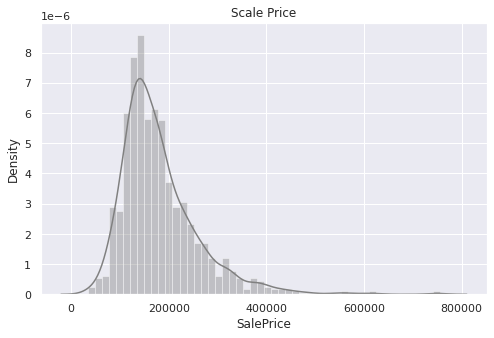

In [45]:
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize': (8,5)})

sns.distplot(a = df['SalePrice'], bins=50, color='gray', vertical=False).set_title('Scale Price')

### Heatmap

<AxesSubplot:>

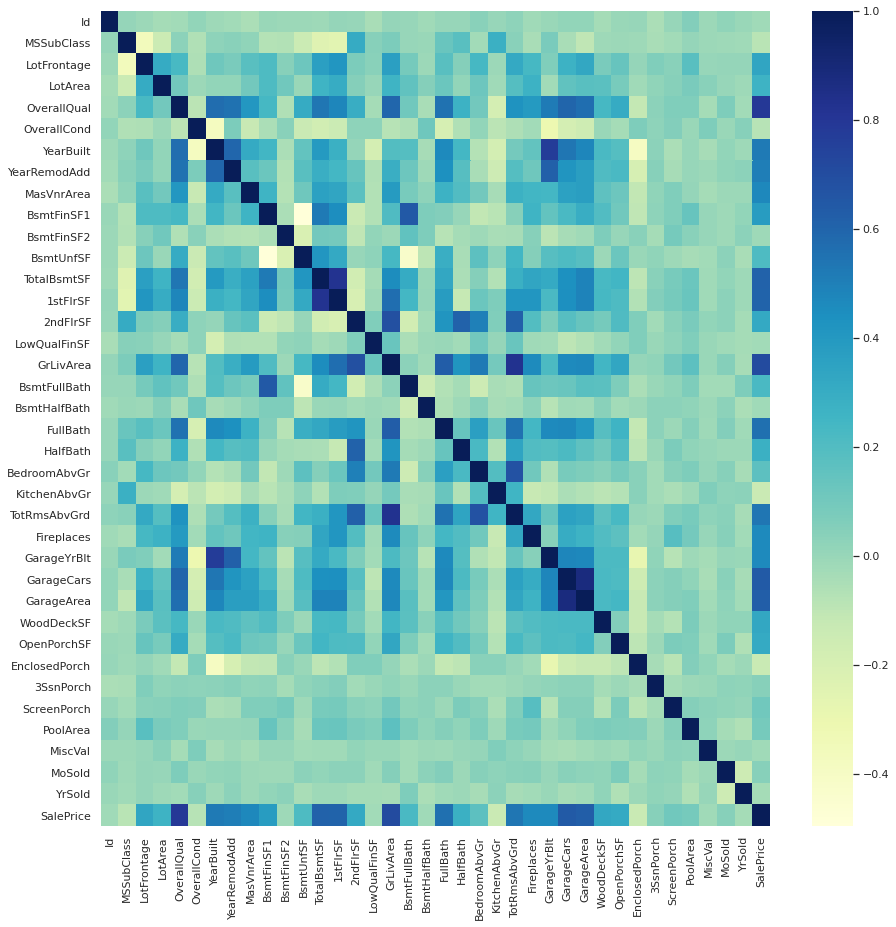

In [46]:
corr = df.corr()

sns.set(style='darkgrid')
sns.set(rc={'figure.figsize': (15,15)})

sns.heatmap(corr, cmap='YlGnBu')

<AxesSubplot:>

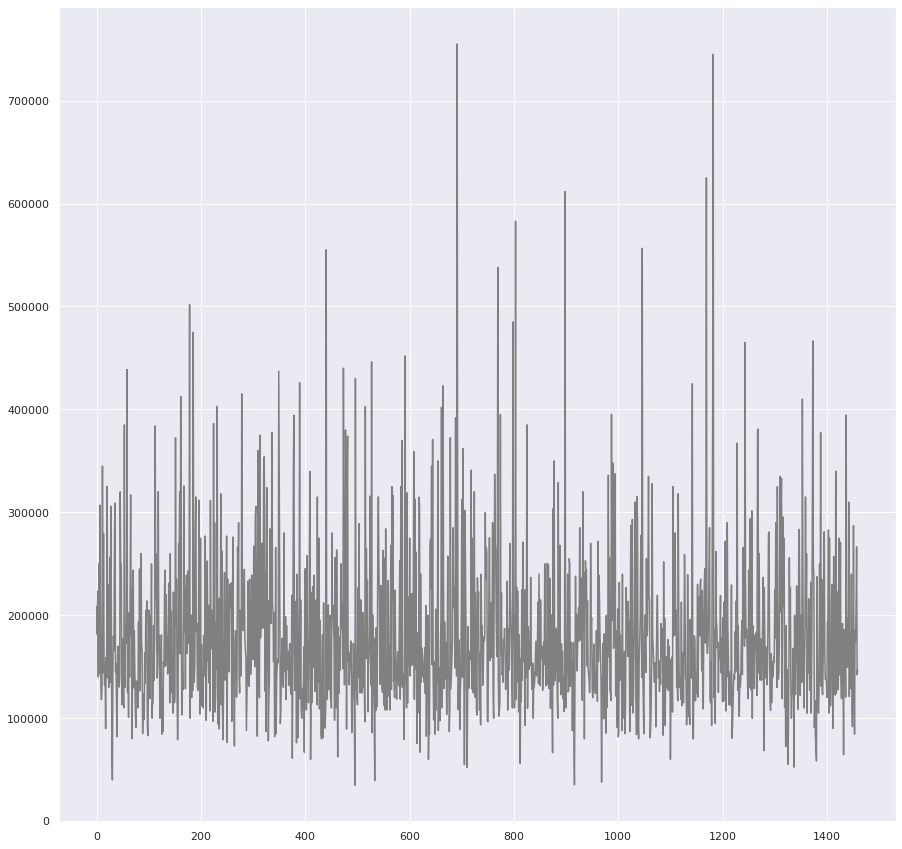

In [47]:
 df['SalePrice'].plot(color='gray')

sns.set(style='darkgrid')
sns.set(rc={'figure.figsize': (7,7)})
sns.scatterplot(x='SalePrice', y='LotArea', data=df, color='gray')

[Text(0.5, 0, 'Residential Low density, Residential Medium density, Commercial, Floating village residential, Residential high density')]

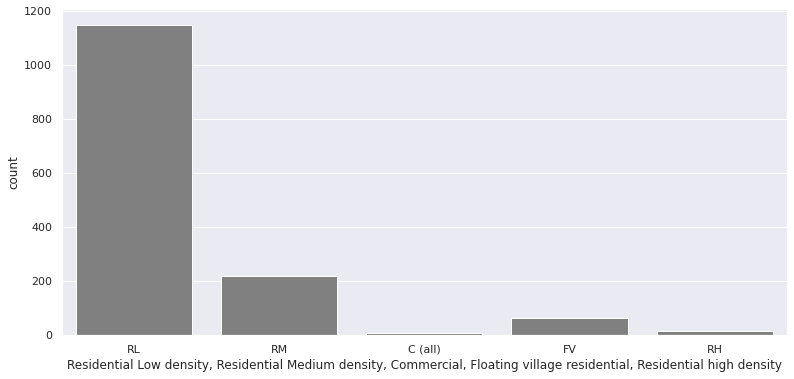

In [48]:
sns.set(rc={'figure.figsize':(13,6)})
ax = sns.countplot(df['MSZoning'], color='gray')
ax.set(xlabel='Residential Low density, Residential Medium density, Commercial, Floating village residential, Residential high density')

<AxesSubplot:xlabel='SalePrice', ylabel='LotFrontage'>

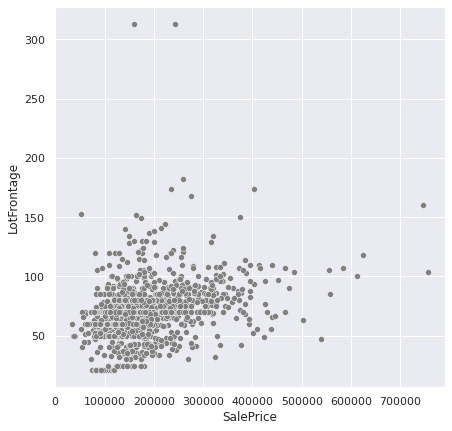

In [49]:
sns.set(rc={'figure.figsize': (7,7)})
sns.scatterplot(x='SalePrice', y='LotFrontage', data=df, color='gray')

<AxesSubplot:xlabel='Street', ylabel='count'>

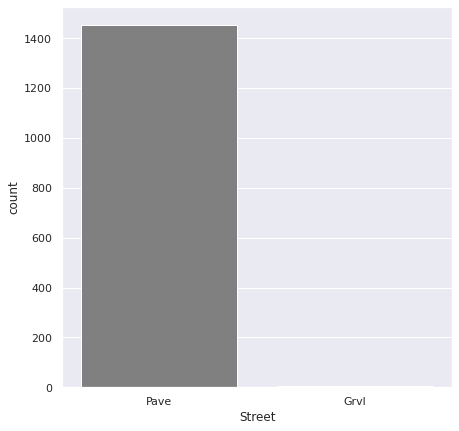

In [50]:
sns.set(rc={'figure.figsize': (7,7)})
sns.countplot(df['Street'], color='gray')

[Text(0.5, 0, 'Regular, Slighty, irregular, Moderately Irregular, Irregular')]

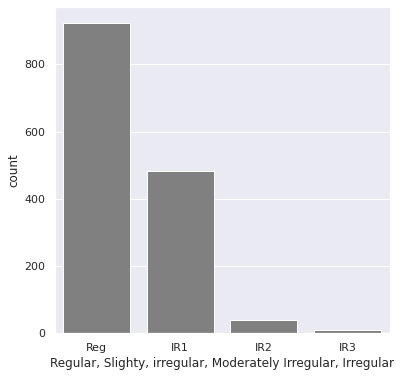

In [51]:
sns.set(rc={'figure.figsize':(6,6)})
ax = sns.countplot(df['LotShape'], color='gray')
ax.set(xlabel='Regular, Slighty, irregular, Moderately Irregular, Irregular')

<AxesSubplot:xlabel='LandContour', ylabel='count'>

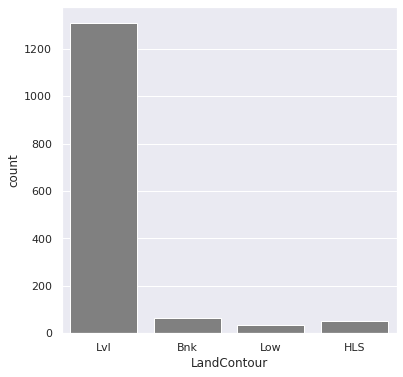

In [52]:
sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(df['LandContour'], color='gray')

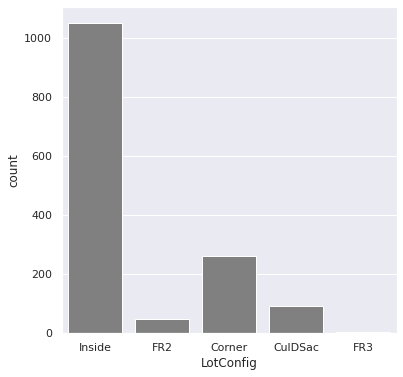

In [53]:
sns.set(rc={'figure.figsize':(6,6)})
ax = sns.countplot(df['LotConfig'], color='gray')

<AxesSubplot:xlabel='LandSlope', ylabel='count'>

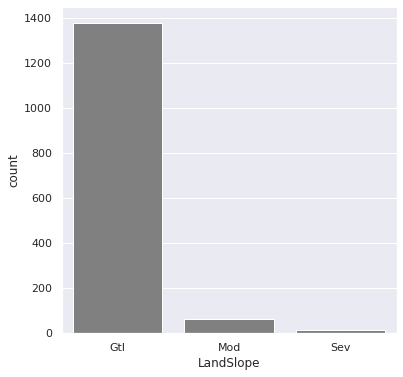

In [54]:
sns.countplot(df['LandSlope'], color='gray')

<AxesSubplot:xlabel='Neighborhood', ylabel='count'>

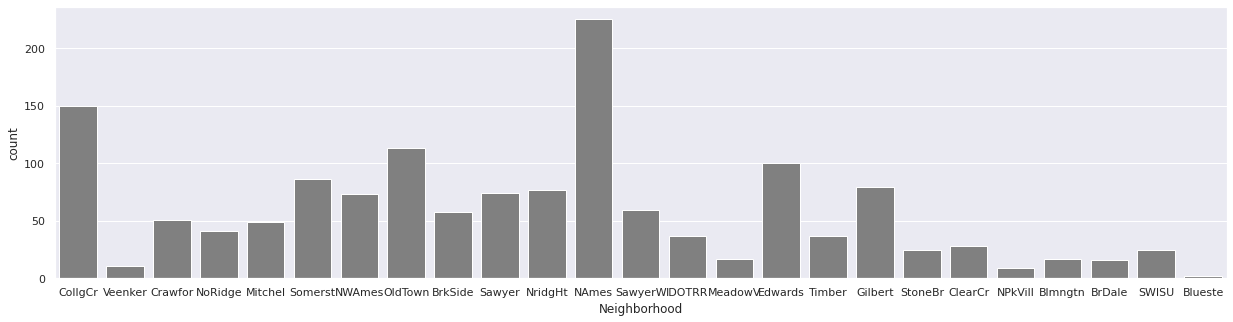

In [55]:
sns.set(rc={'figure.figsize':(21,5)})
sns.countplot(df['Neighborhood'], color='gray')

<AxesSubplot:xlabel='Condition1', ylabel='count'>

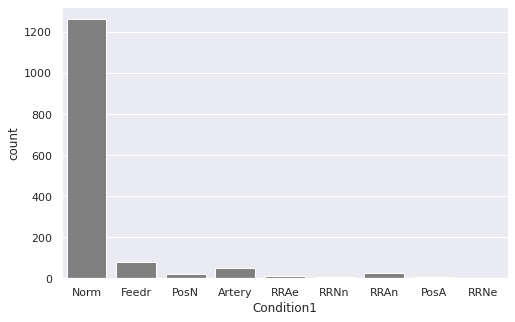

In [56]:
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(df['Condition1'], color='gray')

<AxesSubplot:xlabel='BldgType', ylabel='count'>

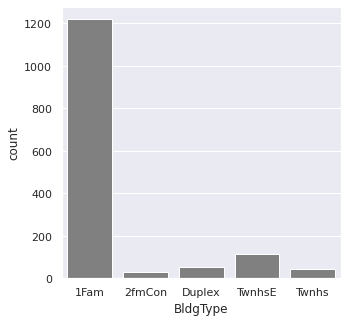

In [57]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(df['BldgType'], color='gray')

<AxesSubplot:xlabel='HouseStyle', ylabel='count'>

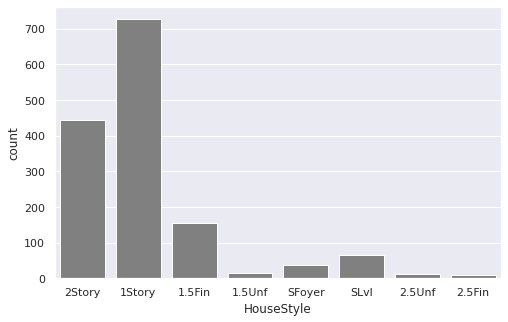

In [58]:
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(df['HouseStyle'], color='gray')

<AxesSubplot:xlabel='OverallQual', ylabel='count'>

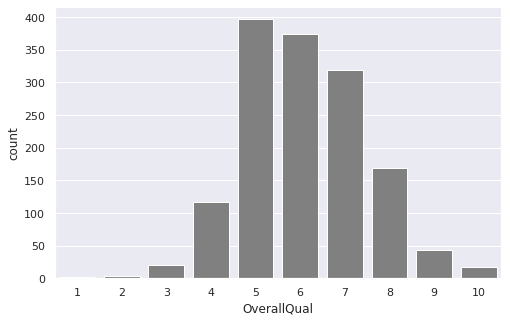

In [59]:
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(df['OverallQual'], color='gray')

<AxesSubplot:xlabel='OverallCond', ylabel='count'>

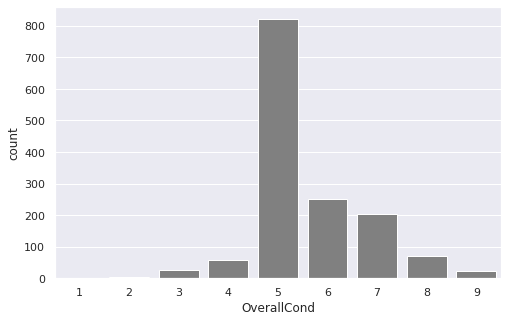

In [60]:
sns.countplot(df['OverallCond'], color='gray')

<AxesSubplot:xlabel='SalePrice', ylabel='YearBuilt'>

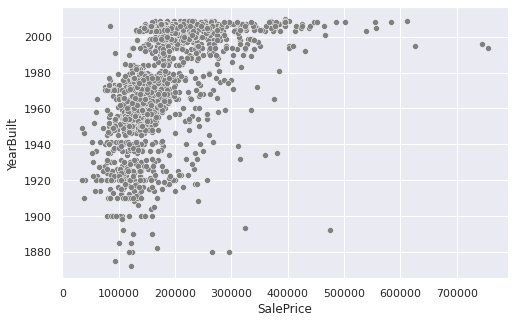

In [61]:
sns.scatterplot(x='SalePrice', y='YearBuilt', data=df, color='gray')

<AxesSubplot:xlabel='SalePrice', ylabel='YearRemodAdd'>

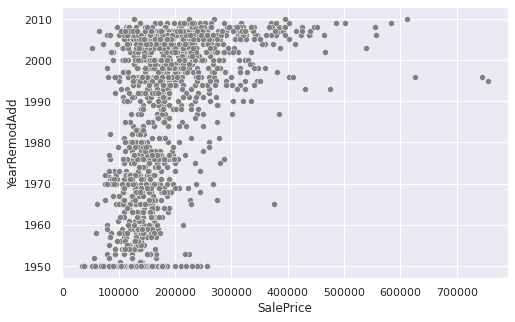

In [62]:
sns.scatterplot(x='SalePrice', y='YearRemodAdd', data=df, color='gray')

<AxesSubplot:xlabel='RoofStyle', ylabel='count'>

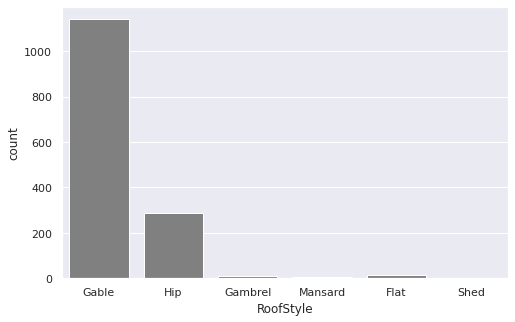

In [63]:
sns.countplot(df['RoofStyle'], color='gray')

<AxesSubplot:xlabel='RoofMatl', ylabel='count'>

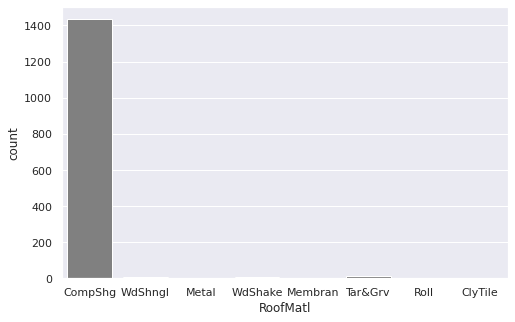

In [64]:
sns.countplot(df['RoofMatl'], color='gray')

<AxesSubplot:xlabel='Exterior1st', ylabel='count'>

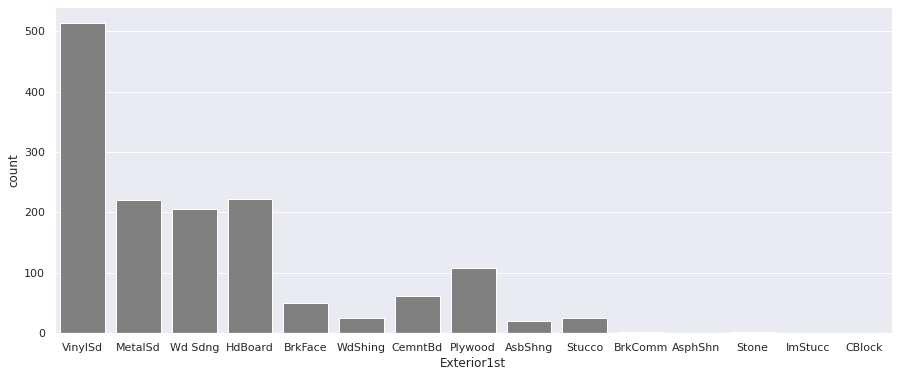

In [65]:
sns.set(rc={'figure.figsize':(15,6)})
sns.countplot(df['Exterior1st'], color='gray')

<AxesSubplot:xlabel='Exterior2nd', ylabel='count'>

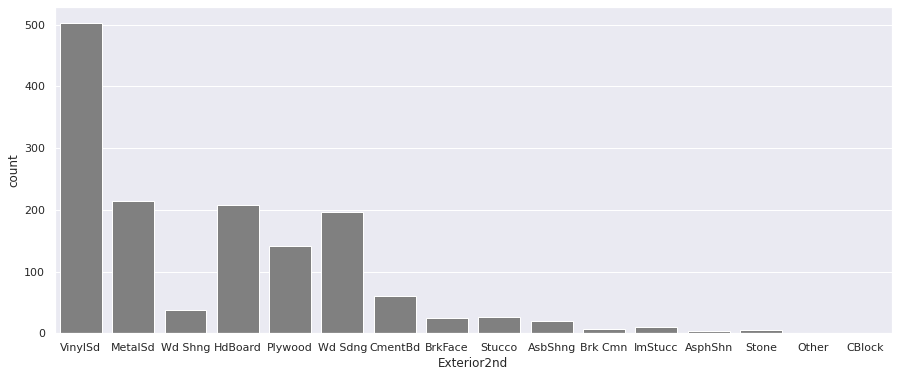

In [66]:
sns.countplot(df['Exterior2nd'], color='gray')

<AxesSubplot:xlabel='MasVnrType', ylabel='count'>

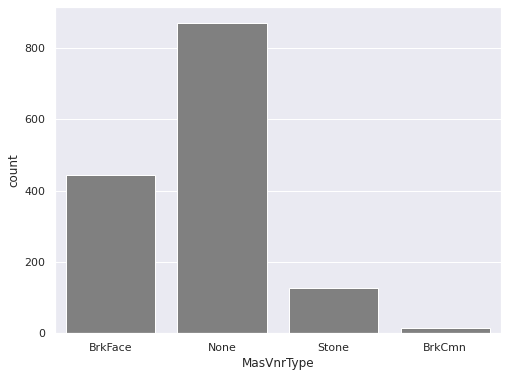

In [67]:
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot(df['MasVnrType'], color='gray')

<AxesSubplot:xlabel='SalePrice', ylabel='MasVnrArea'>

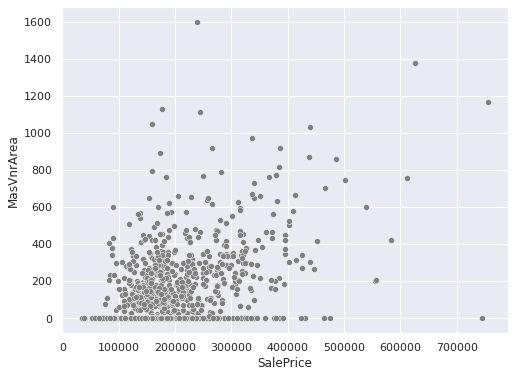

In [68]:
sns.scatterplot(x='SalePrice', y='MasVnrArea', data=df, color='gray')

<AxesSubplot:xlabel='ExterQual', ylabel='count'>

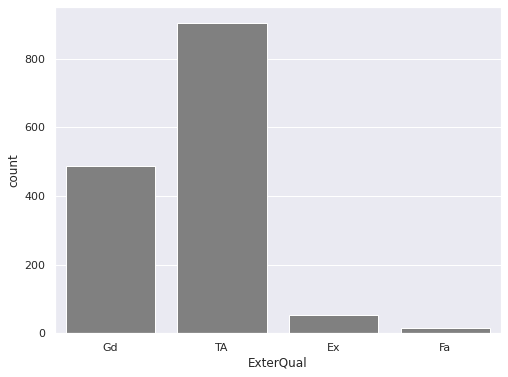

In [69]:
sns.countplot(df['ExterQual'], color='gray')

<AxesSubplot:xlabel='ExterCond', ylabel='count'>

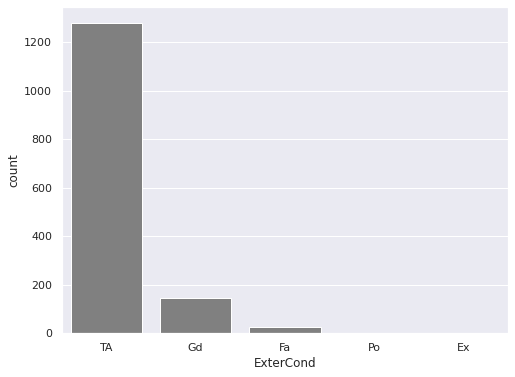

In [70]:
sns.countplot(df['ExterCond'], color='gray')

<AxesSubplot:xlabel='Foundation', ylabel='count'>

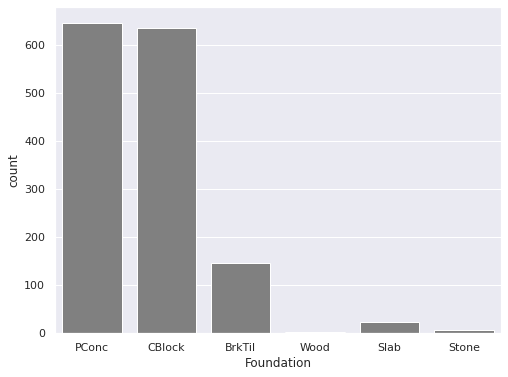

In [71]:
sns.countplot(df['Foundation'], color='gray')

<AxesSubplot:xlabel='BsmtQual', ylabel='count'>

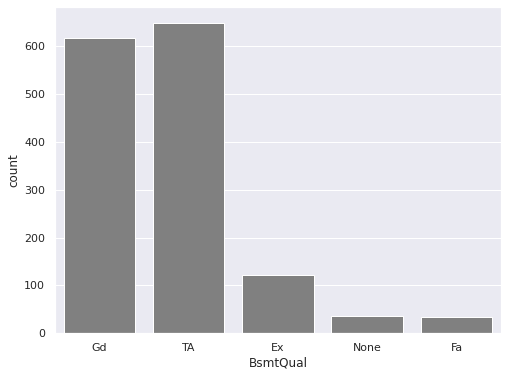

In [72]:
sns.countplot(df['BsmtQual'], color='gray')

<AxesSubplot:xlabel='BsmtCond', ylabel='count'>

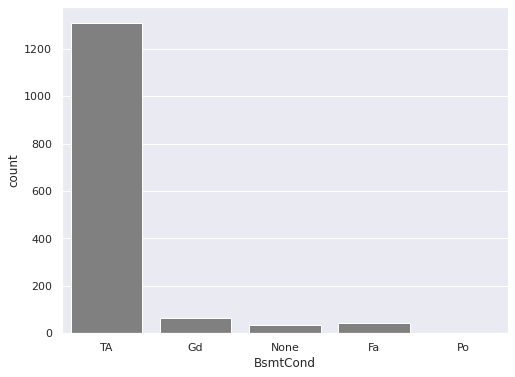

In [73]:
sns.countplot(df['BsmtCond'], color='gray')

<AxesSubplot:xlabel='BsmtExposure', ylabel='count'>

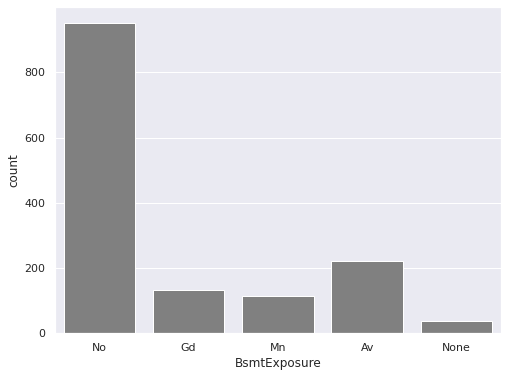

In [74]:
sns.countplot(df['BsmtExposure'], color='gray')

<AxesSubplot:xlabel='BsmtFinType1', ylabel='count'>

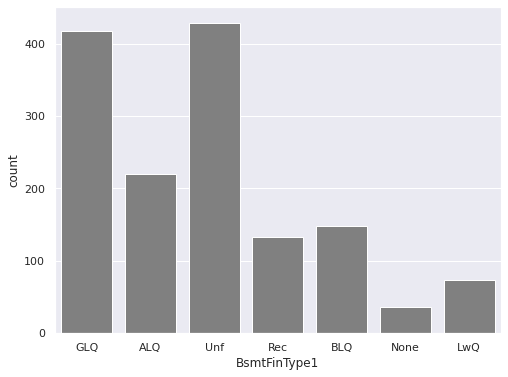

In [75]:
sns.countplot(df['BsmtFinType1'], color='gray')

<AxesSubplot:xlabel='SalePrice', ylabel='BsmtFinSF1'>

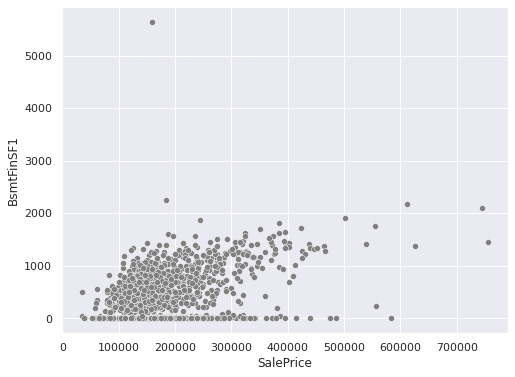

In [76]:
sns.scatterplot(x='SalePrice', y='BsmtFinSF1', data=df, color='gray')

<AxesSubplot:xlabel='BsmtFinType2', ylabel='count'>

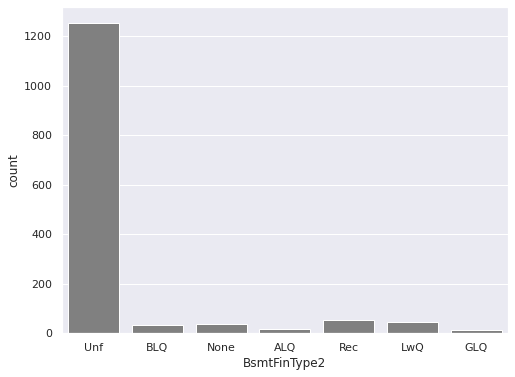

In [77]:
sns.countplot(df['BsmtFinType2'], color='gray')

<AxesSubplot:xlabel='SalePrice', ylabel='BsmtUnfSF'>

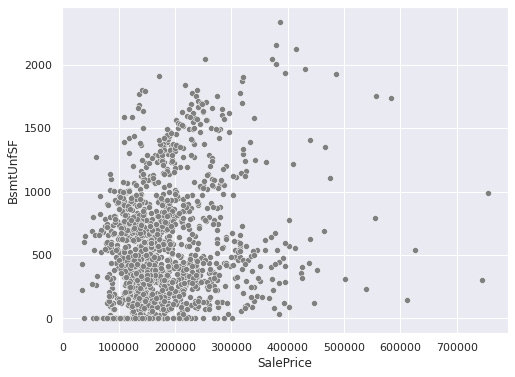

In [78]:
sns.scatterplot(x='SalePrice', y='BsmtUnfSF', data=df, color='gray')

<AxesSubplot:xlabel='SalePrice', ylabel='TotalBsmtSF'>

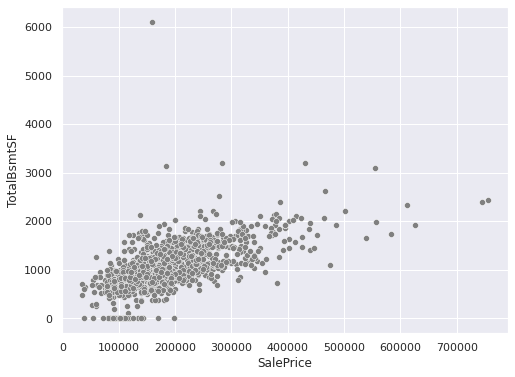

In [79]:
sns.scatterplot(x='SalePrice', y='TotalBsmtSF', data=df, color='gray')

<AxesSubplot:xlabel='Heating', ylabel='count'>

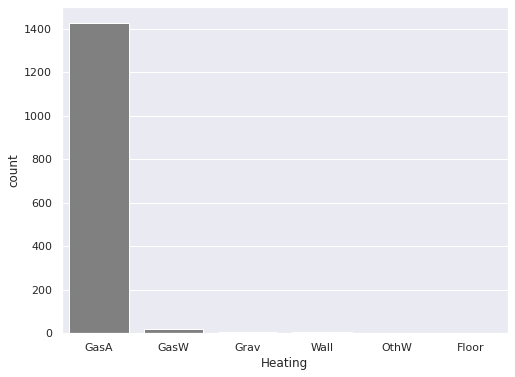

In [80]:
sns.countplot(df['Heating'], color='gray')

<AxesSubplot:xlabel='HeatingQC', ylabel='count'>

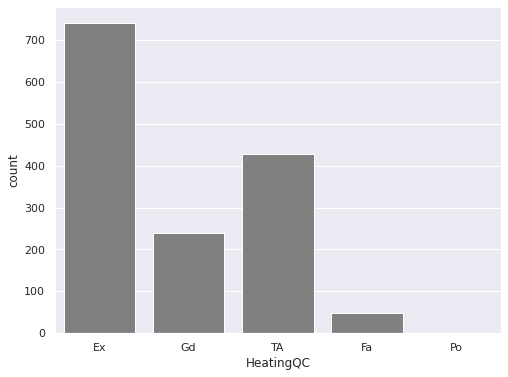

In [81]:
sns.countplot(df['HeatingQC'], color='gray')

<AxesSubplot:xlabel='CentralAir', ylabel='count'>

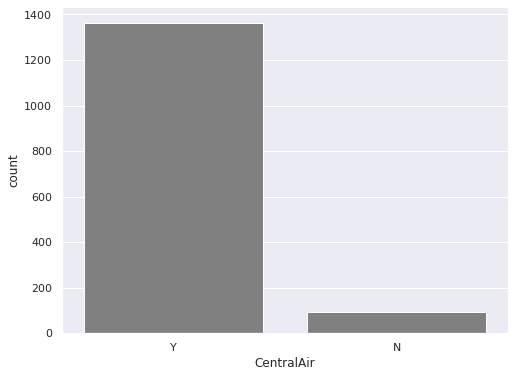

In [82]:
sns.countplot(df['CentralAir'], color='gray')

<AxesSubplot:xlabel='Electrical', ylabel='count'>

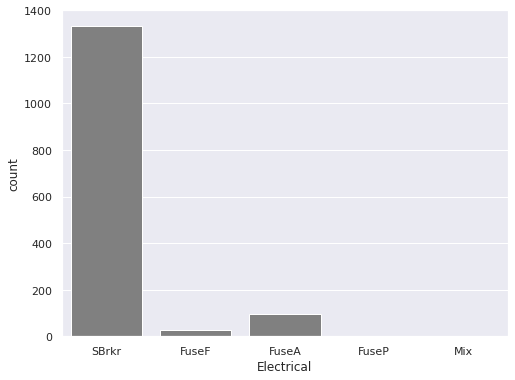

In [83]:
sns.countplot(df['Electrical'], color='gray')

<AxesSubplot:xlabel='SalePrice', ylabel='1stFlrSF'>

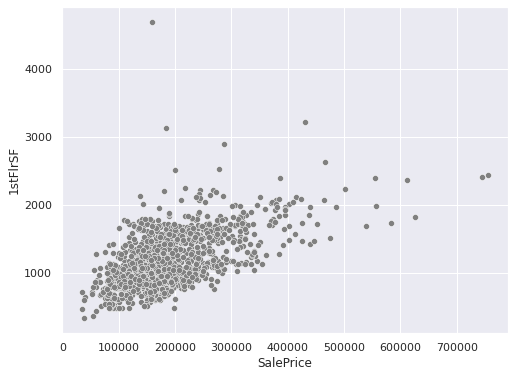

In [84]:
sns.scatterplot(x='SalePrice', y='1stFlrSF', data=df, color='gray')

<AxesSubplot:xlabel='SalePrice', ylabel='LowQualFinSF'>

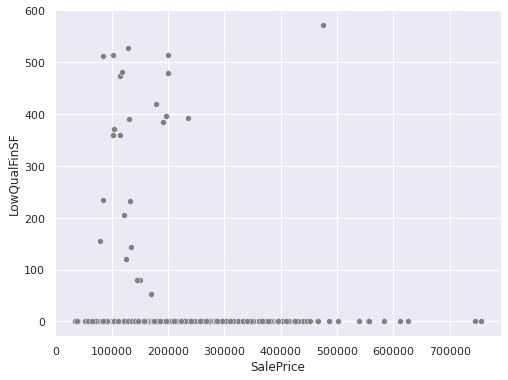

In [85]:
sns.scatterplot(x='SalePrice', y='LowQualFinSF', data=df, color='gray')

<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>

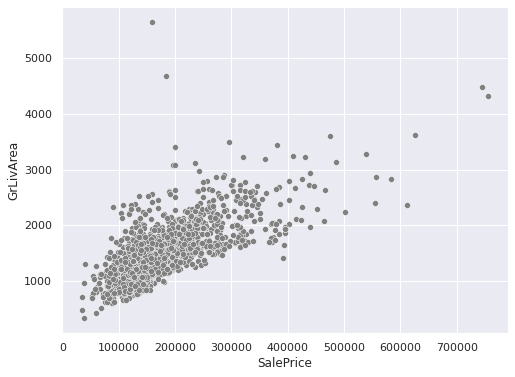

In [86]:
sns.scatterplot(x='SalePrice', y='GrLivArea', data=df, color='gray')

<AxesSubplot:xlabel='BsmtFullBath', ylabel='count'>

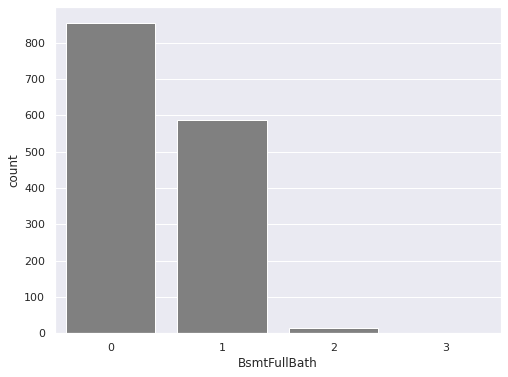

In [87]:
sns.countplot(df['BsmtFullBath'], color='gray')

<AxesSubplot:xlabel='BsmtHalfBath', ylabel='count'>

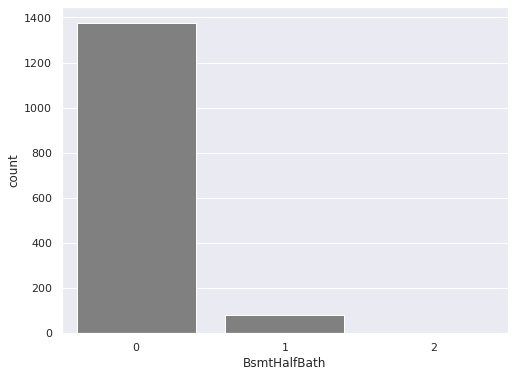

In [88]:
sns.countplot(df['BsmtHalfBath'], color='gray')

<AxesSubplot:xlabel='FullBath', ylabel='count'>

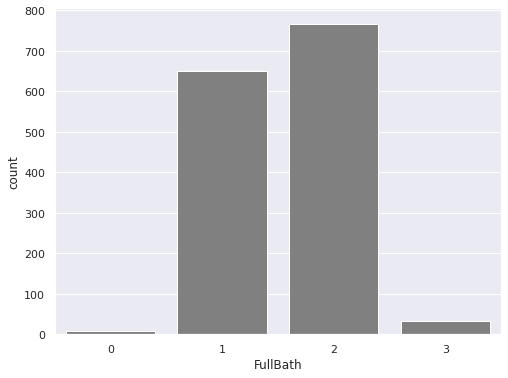

In [89]:
sns.countplot(df['FullBath'], color='gray')

<AxesSubplot:xlabel='HalfBath', ylabel='count'>

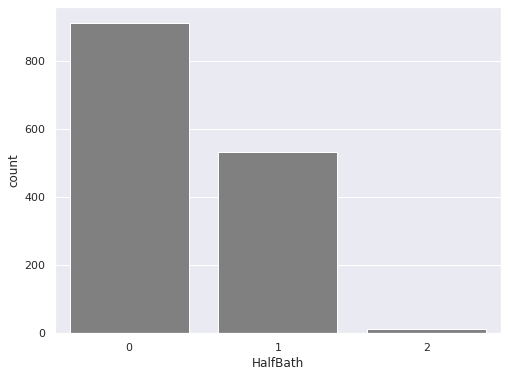

In [90]:
sns.countplot(df['HalfBath'], color='gray')

<AxesSubplot:xlabel='KitchenQual', ylabel='count'>

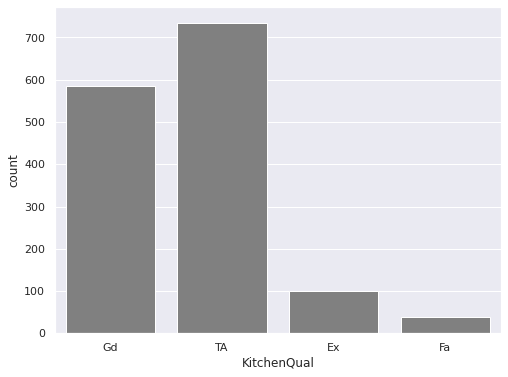

In [91]:
sns.countplot(df['KitchenQual'], color='gray')

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='count'>

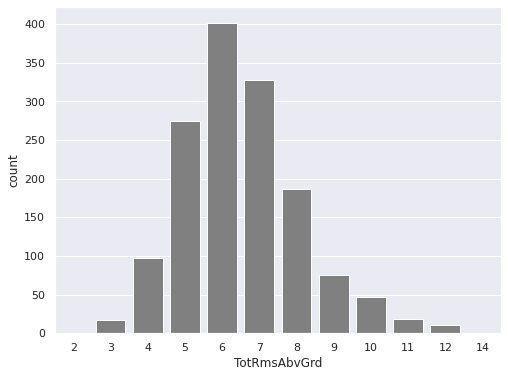

In [92]:
sns.countplot(df['TotRmsAbvGrd'], color='gray')

<AxesSubplot:xlabel='Functional', ylabel='count'>

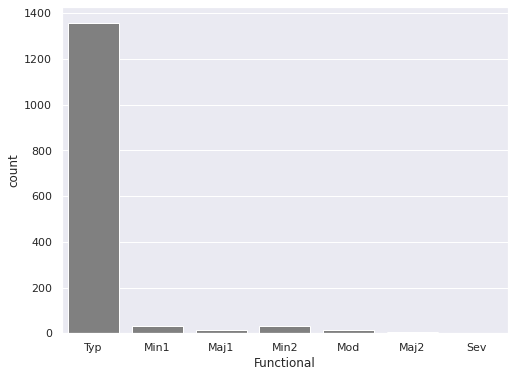

In [93]:
sns.countplot(df['Functional'], color='gray')

<AxesSubplot:xlabel='Fireplaces', ylabel='count'>

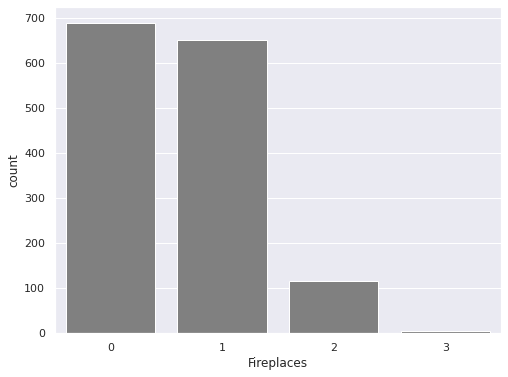

In [94]:
sns.countplot(df['Fireplaces'], color='gray')

<AxesSubplot:xlabel='GarageType', ylabel='count'>

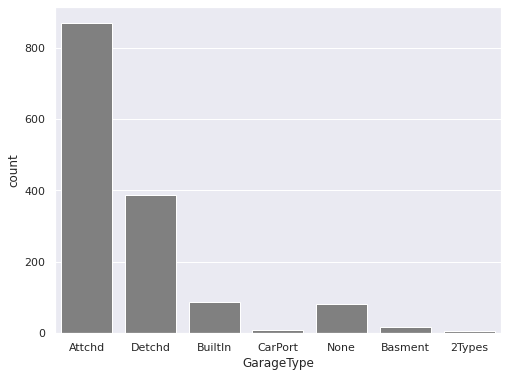

In [95]:
sns.countplot(df['GarageType'], color='gray')

<AxesSubplot:xlabel='SalePrice', ylabel='GarageYrBlt'>

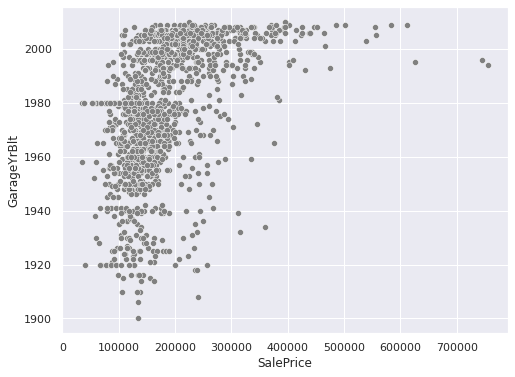

In [96]:
sns.scatterplot(x='SalePrice', y='GarageYrBlt', data=df, color='gray')

<AxesSubplot:xlabel='GarageFinish', ylabel='count'>

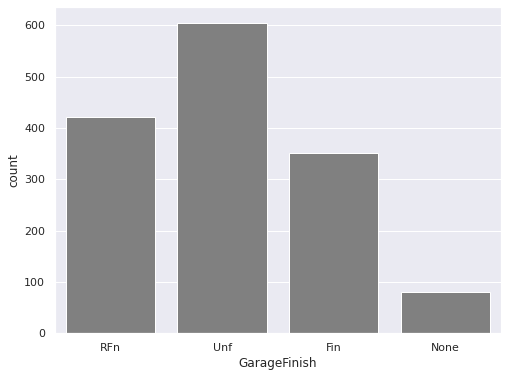

In [97]:
sns.countplot(df['GarageFinish'], color='gray')

<AxesSubplot:xlabel='GarageCars', ylabel='count'>

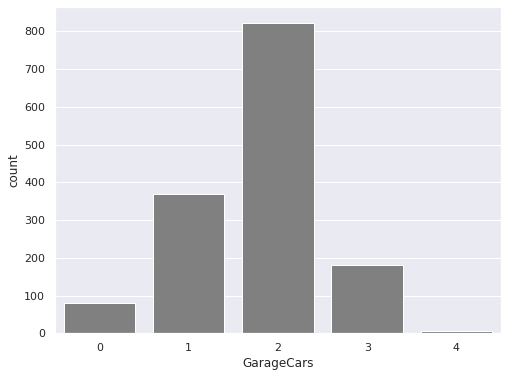

In [98]:
sns.countplot(df['GarageCars'], color='gray')

<AxesSubplot:xlabel='SalePrice', ylabel='GarageArea'>

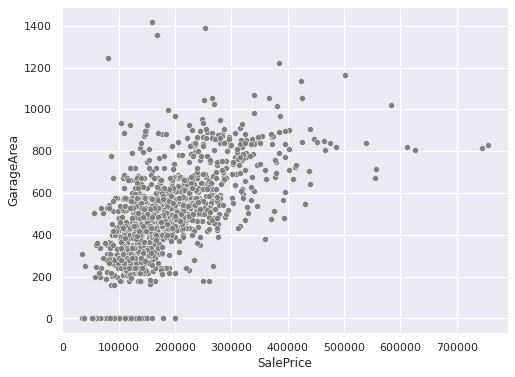

In [99]:
sns.scatterplot(x='SalePrice', y='GarageArea', data=df, color='gray')

<AxesSubplot:xlabel='GarageQual', ylabel='count'>

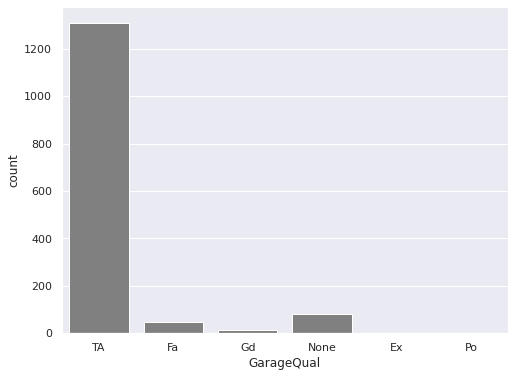

In [100]:
sns.countplot(df['GarageQual'], color='gray')

<AxesSubplot:xlabel='GarageCond', ylabel='count'>

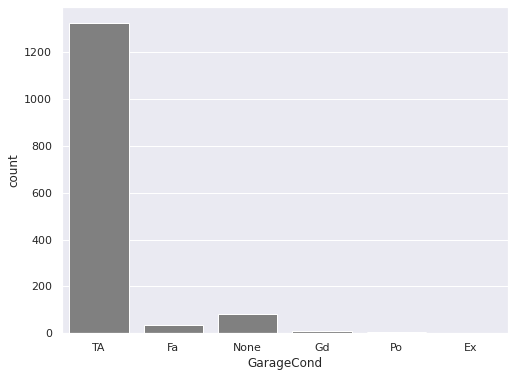

In [101]:
sns.countplot(df['GarageCond'], color='gray')

<AxesSubplot:xlabel='PavedDrive', ylabel='count'>

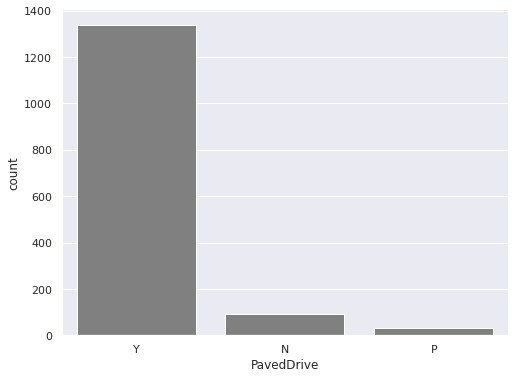

In [102]:
sns.countplot(df['PavedDrive'], color='gray')

<AxesSubplot:xlabel='SalePrice', ylabel='WoodDeckSF'>

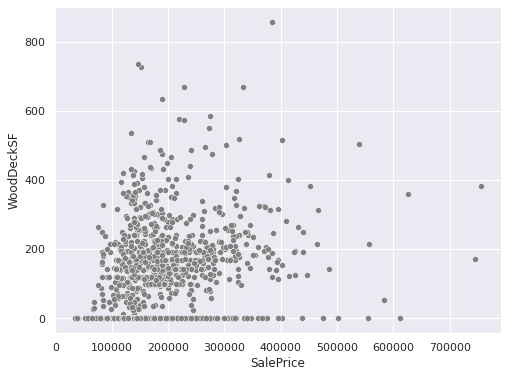

In [103]:
sns.scatterplot(x='SalePrice', y='WoodDeckSF', data=df, color='gray')

<AxesSubplot:xlabel='SalePrice', ylabel='OpenPorchSF'>

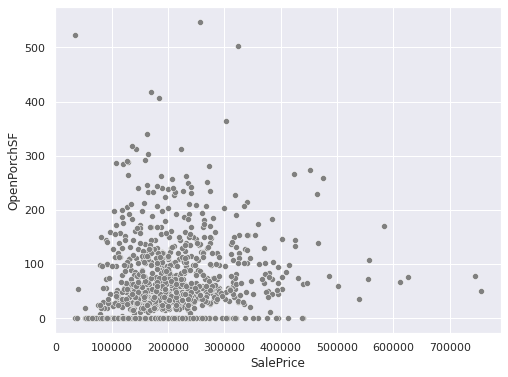

In [104]:
sns.scatterplot(x='SalePrice', y='OpenPorchSF', data=df, color='gray')

<AxesSubplot:xlabel='SalePrice', ylabel='EnclosedPorch'>

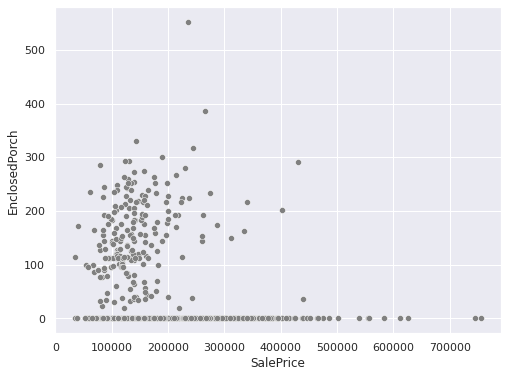

In [105]:
sns.scatterplot(x='SalePrice', y='EnclosedPorch', data=df, color='gray')

<AxesSubplot:xlabel='SalePrice', ylabel='3SsnPorch'>

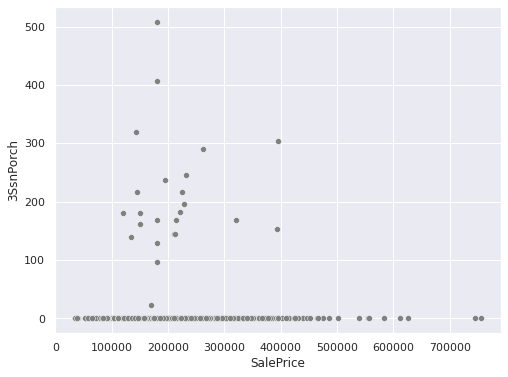

In [106]:
sns.scatterplot(x='SalePrice', y='3SsnPorch', data=df, color='gray')

<AxesSubplot:xlabel='SalePrice', ylabel='ScreenPorch'>

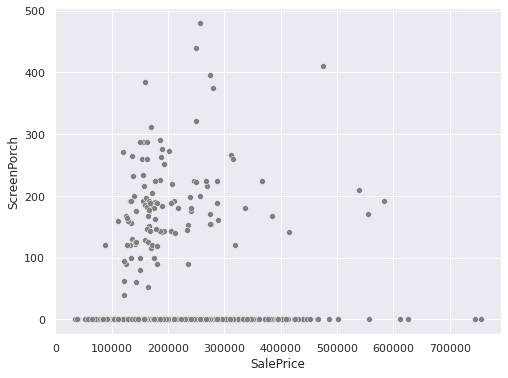

In [107]:
sns.scatterplot(x='SalePrice', y='ScreenPorch', data=df, color='gray')

<AxesSubplot:xlabel='SalePrice', ylabel='PoolArea'>

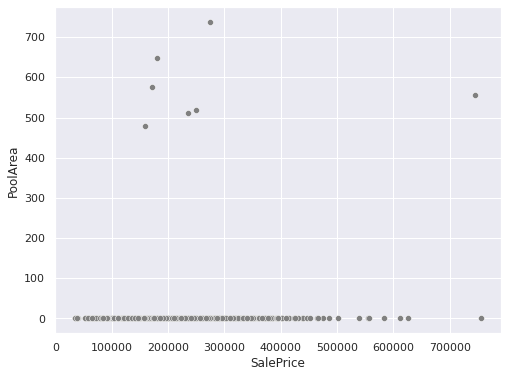

In [108]:
sns.scatterplot(x='SalePrice', y='PoolArea', data=df, color='gray')

<AxesSubplot:xlabel='SalePrice', ylabel='MiscVal'>

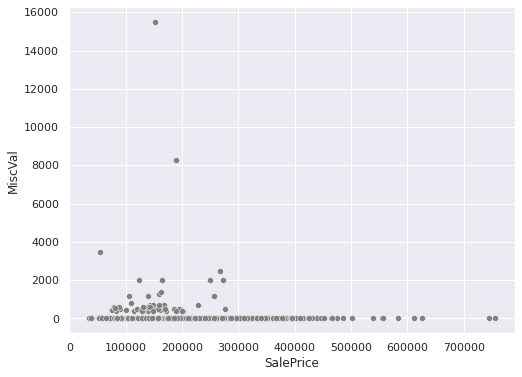

In [109]:
sns.scatterplot(x='SalePrice', y='MiscVal', data=df, color='gray')

<AxesSubplot:xlabel='MoSold', ylabel='count'>

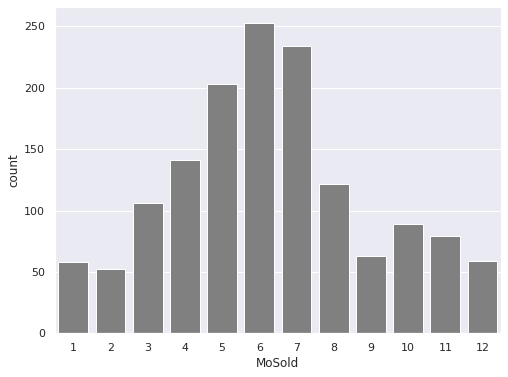

In [110]:
sns.countplot(df['MoSold'], color='gray')

<AxesSubplot:xlabel='YrSold', ylabel='count'>

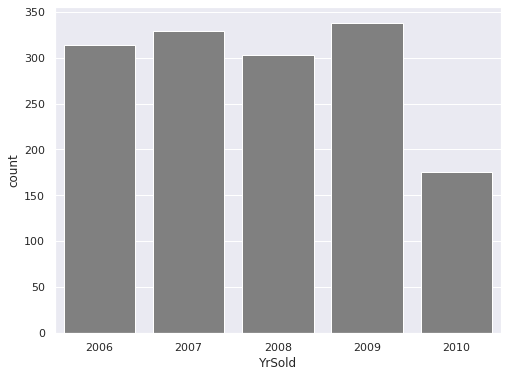

In [111]:
sns.countplot(df['YrSold'], color='gray')

<AxesSubplot:xlabel='SaleType', ylabel='count'>

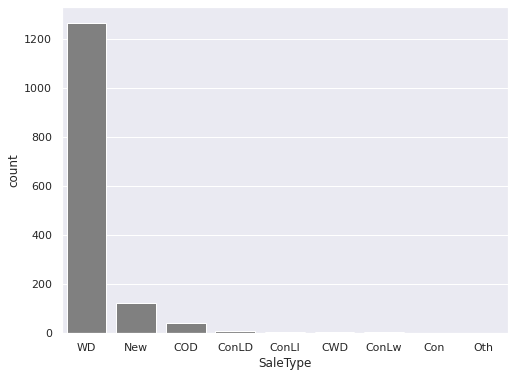

In [112]:
sns.countplot(df['SaleType'], color='gray')

<AxesSubplot:xlabel='SaleCondition', ylabel='count'>

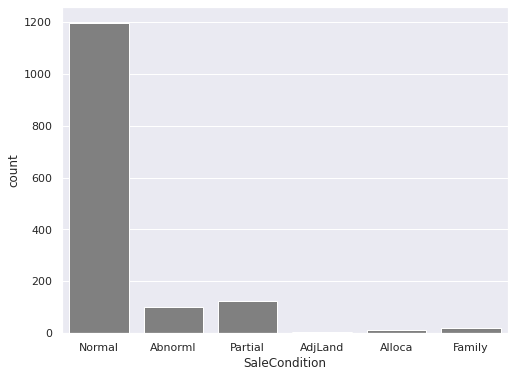

In [113]:
sns.countplot(df['SaleCondition'], color='gray')

## Feature Engineering

In [114]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckS

In [115]:
df['Remodel'] = df['YearBuilt'] != df['YearRemodAdd']
df['Remodel'] = df['Remodel'].astype(int)
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  None      Reg   
1   2          20       RL         80.0     9600   Pave  None      Reg   
2   3          60       RL         68.0    11250   Pave  None      IR1   
3   4          70       RL         60.0     9550   Pave  None      IR1   
4   5          60       RL         84.0    14260   Pave  None      IR1   

  LandContour LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0         Lvl    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1         Lvl       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2         Lvl    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3         Lvl    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4         Lvl       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0        None     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   
3          Gd             7

In [116]:
df_test['Remodel'] = df['YearBuilt'] != df['YearRemodAdd']
df_test['Remodel'] = df['Remodel'].astype(int)
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave  None      Reg   
1  1462          20       RL         81.0    14267   Pave  None      IR1   
2  1463          60       RL         74.0    13830   Pave  None      IR1   
3  1464          60       RL         78.0     9978   Pave  None      IR1   
4  1465         120       RL         43.0     5005   Pave  None      IR1   

  LandContour LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0         Lvl    Inside       Gtl        NAmes      Feedr       Norm     1Fam   
1         Lvl    Corner       Gtl        NAmes       Norm       Norm     1Fam   
2         Lvl    Inside       Gtl      Gilbert       Norm       Norm     1Fam   
3         Lvl    Inside       Gtl      Gilbert       Norm       Norm     1Fam   
4         HLS    Inside       Gtl      StoneBr       Norm       Norm   TwnhsE   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     1Story            5            6       1961          1961     Gable   
1     1Story            6            6       1958          1958       Hip   
2     2Story            5            5       1997          1998     Gable   
3     2Story            6            6       1998          1998     Gable   
4     1Story            8            5       1992          1992     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd       None         0.0        TA        TA   
1  CompShg     Wd Sdng     Wd Sdng    BrkFace       108.0        TA        TA   
2  CompShg     VinylSd     VinylSd       None         0.0        TA        TA   
3  CompShg     VinylSd     VinylSd    BrkFace        20.0        TA        TA   
4  CompShg     HdBoard     HdBoard       None         0.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinSF1  \
0     CBlock       TA       TA           No          Rec        468   
1     CBlock       TA       TA           No          ALQ        923   
2      PConc       Gd       TA           No          GLQ        791   
3      PConc       TA       TA           No          GLQ        602   
4      PConc       Gd       TA           No          ALQ        263   

  BsmtFinType2 BsmtFinSF2 BsmtUnfSF TotalBsmtSF Heating HeatingQC CentralAir  \
0          LwQ        144       270         882    GasA        TA          Y   
1          Unf          0       406        1329    GasA        TA          Y   
2          Unf          0       137         928    GasA        Gd          Y   
3          Unf          0       324         926    GasA        Ex          Y   
4          Unf          0      1017        1280    GasA        Ex          Y   

  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea BsmtFullBath  \
0      SBrkr       896         0             0        896            0   
1      SBrkr      1329         0             0       1329            0   
2      SBrkr       928       701             0       1629            0   
3      SBrkr       926       678             0       1604            0   
4      SBrkr      1280         0             0       1280            0   

  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0            0         1         0             2             1          TA   
1            0         1         1             3             1          Gd   
2            0         2         1             3             1          TA   
3            0         2         1             3             1          Gd   
4            0         2         0             2             1          Gd   

   TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
0             5        Typ           0        None     Attchd       1961.0   
1             6        Typ           0        None     Attchd       1958.0   
2             6        Typ           1          TA     

In [117]:
today = date.today()
def calculate_age(YearBuilt):
    YearBuilt = str(YearBuilt)
    built = datetime.strptime(YearBuilt, '%Y').date()
    return today.year - built.year

In [118]:
df['HouseAge'] = df['YearBuilt'].apply(calculate_age)
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  None      Reg   
1   2          20       RL         80.0     9600   Pave  None      Reg   
2   3          60       RL         68.0    11250   Pave  None      IR1   
3   4          70       RL         60.0     9550   Pave  None      IR1   
4   5          60       RL         84.0    14260   Pave  None      IR1   

  LandContour LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0         Lvl    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1         Lvl       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2         Lvl    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3         Lvl    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4         Lvl       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0        None     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   
3          Gd             7

In [119]:
df_test['HouseAge'] = df_test['YearBuilt'].apply(calculate_age)
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave  None      Reg   
1  1462          20       RL         81.0    14267   Pave  None      IR1   
2  1463          60       RL         74.0    13830   Pave  None      IR1   
3  1464          60       RL         78.0     9978   Pave  None      IR1   
4  1465         120       RL         43.0     5005   Pave  None      IR1   

  LandContour LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0         Lvl    Inside       Gtl        NAmes      Feedr       Norm     1Fam   
1         Lvl    Corner       Gtl        NAmes       Norm       Norm     1Fam   
2         Lvl    Inside       Gtl      Gilbert       Norm       Norm     1Fam   
3         Lvl    Inside       Gtl      Gilbert       Norm       Norm     1Fam   
4         HLS    Inside       Gtl      StoneBr       Norm       Norm   TwnhsE   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     1Story            5            6       1961          1961     Gable   
1     1Story            6            6       1958          1958       Hip   
2     2Story            5            5       1997          1998     Gable   
3     2Story            6            6       1998          1998     Gable   
4     1Story            8            5       1992          1992     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd       None         0.0        TA        TA   
1  CompShg     Wd Sdng     Wd Sdng    BrkFace       108.0        TA        TA   
2  CompShg     VinylSd     VinylSd       None         0.0        TA        TA   
3  CompShg     VinylSd     VinylSd    BrkFace        20.0        TA        TA   
4  CompShg     HdBoard     HdBoard       None         0.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinSF1  \
0     CBlock       TA       TA           No          Rec        468   
1     CBlock       TA       TA           No          ALQ        923   
2      PConc       Gd       TA           No          GLQ        791   
3      PConc       TA       TA           No          GLQ        602   
4      PConc       Gd       TA           No          ALQ        263   

  BsmtFinType2 BsmtFinSF2 BsmtUnfSF TotalBsmtSF Heating HeatingQC CentralAir  \
0          LwQ        144       270         882    GasA        TA          Y   
1          Unf          0       406        1329    GasA        TA          Y   
2          Unf          0       137         928    GasA        Gd          Y   
3          Unf          0       324         926    GasA        Ex          Y   
4          Unf          0      1017        1280    GasA        Ex          Y   

  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea BsmtFullBath  \
0      SBrkr       896         0             0        896            0   
1      SBrkr      1329         0             0       1329            0   
2      SBrkr       928       701             0       1629            0   
3      SBrkr       926       678             0       1604            0   
4      SBrkr      1280         0             0       1280            0   

  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0            0         1         0             2             1          TA   
1            0         1         1             3             1          Gd   
2            0         2         1             3             1          TA   
3            0         2         1             3             1          Gd   
4            0         2         0             2             1          Gd   

   TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
0             5        Typ           0        None     Attchd       1961.0   
1             6        Typ           0        None     Attchd       1958.0   
2             6        Typ           1          TA     

In [120]:
df.drop('YearBuilt', axis=1, inplace=True)
df.drop('YearRemodAdd', axis=1, inplace=True)

df_test.drop('YearBuilt', axis=1, inplace=True)
df_test.drop('YearRemodAdd', axis=1, inplace=True)

In [121]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  None      Reg   
1   2          20       RL         80.0     9600   Pave  None      Reg   
2   3          60       RL         68.0    11250   Pave  None      IR1   
3   4          70       RL         60.0     9550   Pave  None      IR1   
4   5          60       RL         84.0    14260   Pave  None      IR1   

  LandContour LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0         Lvl    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1         Lvl       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2         Lvl    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3         Lvl    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4         Lvl       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl Exterior1st  \
0     2Story            7            5     Gable  CompShg     VinylSd   
1     1Story            6            8     Gable  CompShg     MetalSd   
2     2Story            7            5     Gable  CompShg     VinylSd   
3     2Story            7            5     Gable  CompShg     Wd Sdng   
4     2Story            8            5     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd   
1     MetalSd       None         0.0        TA        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd   
3     Wd Shng       None         0.0        TA        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       TA           No          GLQ         706          Unf           0   
1       TA           Gd          ALQ         978          Unf           0   
2       TA           Mn          GLQ         486          Unf           0   
3       Gd           No          ALQ         216          Unf           0   
4       TA           Av          GLQ         655          Unf           0   

   BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  \
0        150          856    GasA        Ex          Y      SBrkr       856   
1        284         1262    GasA        Ex          Y      SBrkr      1262   
2        434          920    GasA        Ex          Y      SBrkr       920   
3        540          756    GasA        Gd          Y      SBrkr       961   
4        490         1145    GasA        Ex          Y      SBrkr      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0         1             3             1          Gd             8        Typ   
1         0             3             1          TA             6        Typ   
2         1             3             1          Gd             6        Typ   
3         0             3             1          Gd             7        Typ   
4         1             4             1          Gd             9        Typ   

   Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  \
0           0        None     Attchd       2003.0          RFn           2   
1           1          TA     Attchd       1976.0          RFn           2   
2           1          TA    

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  RoofStyl

# Building Model

In [123]:
x_train = df[[col for col in df.columns if col not in ['SalePrice', 'Id']]]
y_train = df['SalePrice']
x_train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave  None      Reg   
1          20       RL         80.0     9600   Pave  None      Reg   
2          60       RL         68.0    11250   Pave  None      IR1   
3          70       RL         60.0     9550   Pave  None      IR1   
4          60       RL         84.0    14260   Pave  None      IR1   

  LandContour LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0         Lvl    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1         Lvl       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2         Lvl    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3         Lvl    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4         Lvl       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl Exterior1st  \
0     2Story            7            5     Gable  CompShg     VinylSd   
1     1Story            6            8     Gable  CompShg     MetalSd   
2     2Story            7            5     Gable  CompShg     VinylSd   
3     2Story            7            5     Gable  CompShg     Wd Sdng   
4     2Story            8            5     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd   
1     MetalSd       None         0.0        TA        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd   
3     Wd Shng       None         0.0        TA        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       TA           No          GLQ         706          Unf           0   
1       TA           Gd          ALQ         978          Unf           0   
2       TA           Mn          GLQ         486          Unf           0   
3       Gd           No          ALQ         216          Unf           0   
4       TA           Av          GLQ         655          Unf           0   

   BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  \
0        150          856    GasA        Ex          Y      SBrkr       856   
1        284         1262    GasA        Ex          Y      SBrkr      1262   
2        434          920    GasA        Ex          Y      SBrkr       920   
3        540          756    GasA        Gd          Y      SBrkr       961   
4        490         1145    GasA        Ex          Y      SBrkr      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0         1             3             1          Gd             8        Typ   
1         0             3             1          TA             6        Typ   
2         1             3             1          Gd             6        Typ   
3         0             3             1          Gd             7        Typ   
4         1             4             1          Gd             9        Typ   

   Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  \
0           0        None     Attchd       2003.0          RFn           2   
1           1          TA     Attchd       1976.0          RFn           2   
2           1          TA     Attchd       2001.0    

In [124]:
y_train.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [125]:
x_train = pd.get_dummies(x_train)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Columns: 300 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(33), uint8(264)
memory usage: 837.9 KB


## Random Forrest classifier

In [126]:
rf_clf = RandomForestClassifier(max_depth=500, random_state=0)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=500, random_state=0)

In [128]:
print("Training Accuracy: ",rf_clf.score(x_train, y_train))

Training Accuracy:  1.0


In [129]:
x_test = df[[col for col in df_test.columns if col not in ['SalePrice', 'Id']]]
x_test = pd.get_dummies(x_train)
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Columns: 300 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(33), uint8(264)
memory usage: 837.9 KB


In [130]:
x_test.head()

1                  0   
2                0               0                1                  0   
3                0               0                1                  0   
4                0               0                1                  0   

   RoofStyle_Hip  RoofStyle_Mansard  RoofStyle_Shed  RoofMatl_ClyTile  \
0              0                  0               0                 0   
1              0                  0               0                 0   
2              0                  0               0                 0   
3              0                  0               0                 0   
4              0                  0               0                 0   

   RoofMatl_CompShg  RoofMatl_Membran  RoofMatl_Metal  RoofMatl_Roll  \
0                 1                 0               0              0   
1                 1                 0               0              0   
2                 1                 0               0              0   
3                 1                 0               0              0   
4                 1                 0               0              0   

   RoofMatl_Tar&Grv  RoofMatl_WdShake  RoofMatl_WdShngl  Exterior1st_AsbShng  \
0                 0                 0                 0                    0   
1                 0                 0                 0                    0   
2                 0                 0                 0                    0   
3                 0                 0                 0                    0   
4                 0                 0                 0                    0   

   Exterior1st_AsphShn  Exterior1st_BrkComm  Exterior1st_BrkFace  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   Exterior1st_CBlock  Exterior1st_CemntBd  Exterior1st_HdBoard  \
0                   0                    0                    0   
1                   0                    0                    0   
2                   0                    0                    0   
3                   0                    0                    0   
4                   0                    0                    0   

   Exterior1st_ImStucc  Exterior1st_MetalSd  Exterior1st_Plywood  \
0                    0                    0                    0   
1                    0                    1                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   Exterior1st_Stone  Exterior1st_Stucco  Exterior1st_VinylSd  \
0                  0                   0                    1   
1                  0                   0                    0   
2                  0                   0                    1   
3                  0                   0                    0   
4                  0                   0                    1   

   Exterior1st_Wd Sdng  Exterior1st_WdShing  Exterior2nd_AsbShng  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    1                    0                    0   
4                    0                    0                    0   

   Exterior2nd_AsphShn  Exterior2nd_Brk Cmn  Exterior2nd_BrkFace  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                 

In [131]:
prices = rf_clf.predict(x_test)
prices

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

### Sample Submission file

In [132]:
submission = pd.read_csv('sample_submission.csv')
submission.head()

Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977

In [133]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


### Generating Submission file

In [134]:
output = pd.DataFrame({'Id': df_test.Id, 'SalePrice': prices})
output.head()

Id  SalePrice
0  1461     208500
1  1462     181500
2  1463     223500
3  1464     140000
4  1465     250000

In [135]:
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Id         1459 non-null   int64
 1   SalePrice  1459 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB


In [136]:
output.to_csv('Submission_rf.csv', index=False)